In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [7]:
train_dir = r"C:\Users\naman\OneDrive\Desktop\Deep Learning\mnist-jpg\train"
test_dir = r"C:\Users\naman\OneDrive\Desktop\Deep Learning\mnist-jpg\test"

In [29]:
batch_size = 512
img_size = (28, 28)

train_ds = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
)

test_ds = image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=img_size,
)

Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [30]:
AUTOTUNE = tf.data.AUTOTUNE
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)
train_ds = (
    train_ds
    .map(lambda x, y: (normalization_layer(x), y))
    .map(lambda x, y: (tf.reshape(x, (-1, 28 * 28)), tf.one_hot(y, depth=10)))  # Flatten images and one-hot encode
    .cache()
    .shuffle(1000)  # Large buffer size for shuffling
    .prefetch(buffer_size=AUTOTUNE)  # Prefetch for faster access
)
test_ds = (
    test_ds
    .map(lambda x, y: (normalization_layer(x), y))
    .map(lambda x, y: (tf.reshape(x, (-1, 28 * 28)), tf.one_hot(y, depth=10)))
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [32]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [37]:
sgd = SGD(0.01)
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [38]:
H = model.fit(train_ds, validation_data=test_ds, epochs=epochs)

Epoch 1/150
118/118 [==============================] - 2s 10ms/step - loss: 2.1854 - accuracy: 0.3661 - val_loss: 2.1707 - val_accuracy: 0.3706
Epoch 2/150
118/118 [==============================] - 1s 9ms/step - loss: 2.1622 - accuracy: 0.3745 - val_loss: 2.1445 - val_accuracy: 0.4043
Epoch 3/150
118/118 [==============================] - 1s 9ms/step - loss: 2.1337 - accuracy: 0.3974 - val_loss: 2.1119 - val_accuracy: 0.4119
Epoch 4/150
118/118 [==============================] - 1s 10ms/step - loss: 2.0992 - accuracy: 0.4041 - val_loss: 2.0732 - val_accuracy: 0.4225
Epoch 5/150
118/118 [==============================] - 1s 8ms/step - loss: 2.0579 - accuracy: 0.4186 - val_loss: 2.0273 - val_accuracy: 0.4214
Epoch 6/150
118/118 [==============================] - 1s 8ms/step - loss: 2.0097 - accuracy: 0.4275 - val_loss: 1.9745 - val_accuracy: 0.4405
Epoch 7/150
118/118 [==============================] - 1s 10ms/step - loss: 1.9557 - accuracy: 0.4407 - val_loss: 1.9162 - val_accuracy: 0.4

In [39]:
predictions = np.argmax(model.predict(test_ds), axis=-1)
Y_test = np.concatenate([y.numpy() for _, y in test_ds])
print(classification_report(Y_test.argmax(axis=1), predictions, target_names=[str(i) for i in range(10)]))

20/20 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.97      0.97      0.97      1135
           2       0.89      0.89      0.89      1032
           3       0.90      0.89      0.90      1010
           4       0.90      0.92      0.91       982
           5       0.88      0.84      0.86       892
           6       0.91      0.92      0.92       958
           7       0.93      0.91      0.92      1028
           8       0.88      0.87      0.88       974
           9       0.88      0.88      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



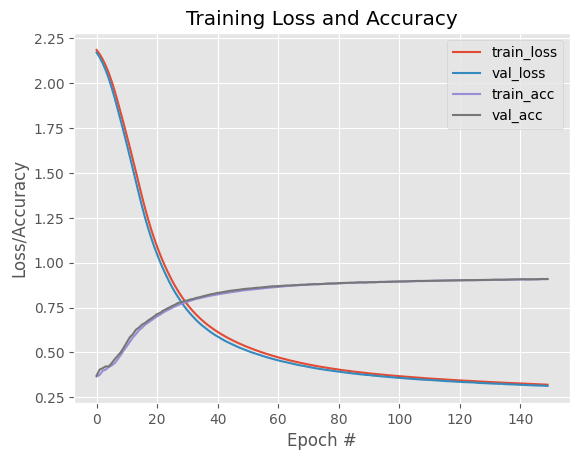

In [40]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

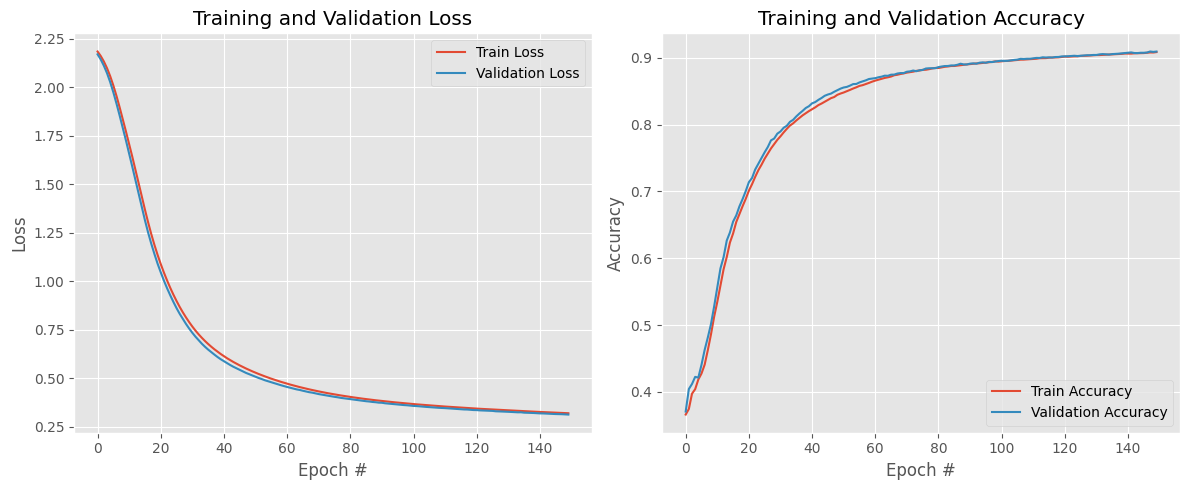

In [41]:
plt.style.use("ggplot")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss on the first subplot
ax1.plot(np.arange(0, epochs), H.history["loss"], label="Train Loss")
ax1.plot(np.arange(0, epochs), H.history["val_loss"], label="Validation Loss")
ax1.set_title("Training and Validation Loss")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend()

# Plot training and validation accuracy on the second subplot
ax2.plot(np.arange(0, epochs), H.history["accuracy"], label="Train Accuracy")
ax2.plot(np.arange(0, epochs), H.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and Validation Accuracy")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Accuracy")
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()